In [1]:
fl = FileLocations()
tree = Signal(fl.get_NMSSM(700,300))

Using default run: default
Using default pair: default


In [2]:
import uproot
f = uproot.open(fl.get_NMSSM(700,300))

In [3]:
f.keys()

['h_cutflow;1', 'sixBtree;1', 'NormWeightTree;1']

In [49]:
VR = np.asarray([50, 50, 50, 60, 70, 65, 62, 60])
CR = np.asarray([99999, 100] + [200]*(len(VR)-3) + [100])

c = np.rec.fromarrays([VR, CR])

CRls = np.asarray([75, 18, 54, 37, 26, 31, 34.7, 7.6])
CRhs = np.asarray([11, 3, 8, 5, 4, 4, 5, 1])

VRls = np.asarray([11, 11, 11, 24, 40, 32, 27, 24])
VRhs = np.asarray([2, 2, 2, 4, 56, 5, 4, 4])

sorted_indices = np.argsort(c)
VR   = VR[sorted_indices]
CR   = CR[sorted_indices]
none = CR == 99999
CRls = CRls[sorted_indices]
CRhs = CRhs[sorted_indices]
VRls = VRls[sorted_indices]
VRhs = VRhs[sorted_indices]

print(CR,'\n',VR)

[False False  True False False False False False]
[  100   200 99999   100   200   200   200   200] 
 [50 50 50 60 60 62 65 70]


In [26]:
SRls = [28]*len(VR)
SRhs = [4.3, 4.2, 4.0, 4.3, 4.2, 4.2, 4, 4.2]

In [67]:
none

array([False, False,  True, False, False, False, False, False])

In [73]:
index = np.arange(len(none))[none][0]

In [81]:
labels = np.array([f"Validation:\n{125-VR_val} to 100\n150 to {125+VR_val}\nControl:\n{125-CR_val} to {125-VR_val}\n{125+VR_val} to {125+CR_val}" for VR_val, CR_val in zip(VR,CR)])

labels[index] = labels[none][0].replace(str(125 - 99999),'0')
labels[index] = labels[none][0].replace(str(125 + 99999),'None')

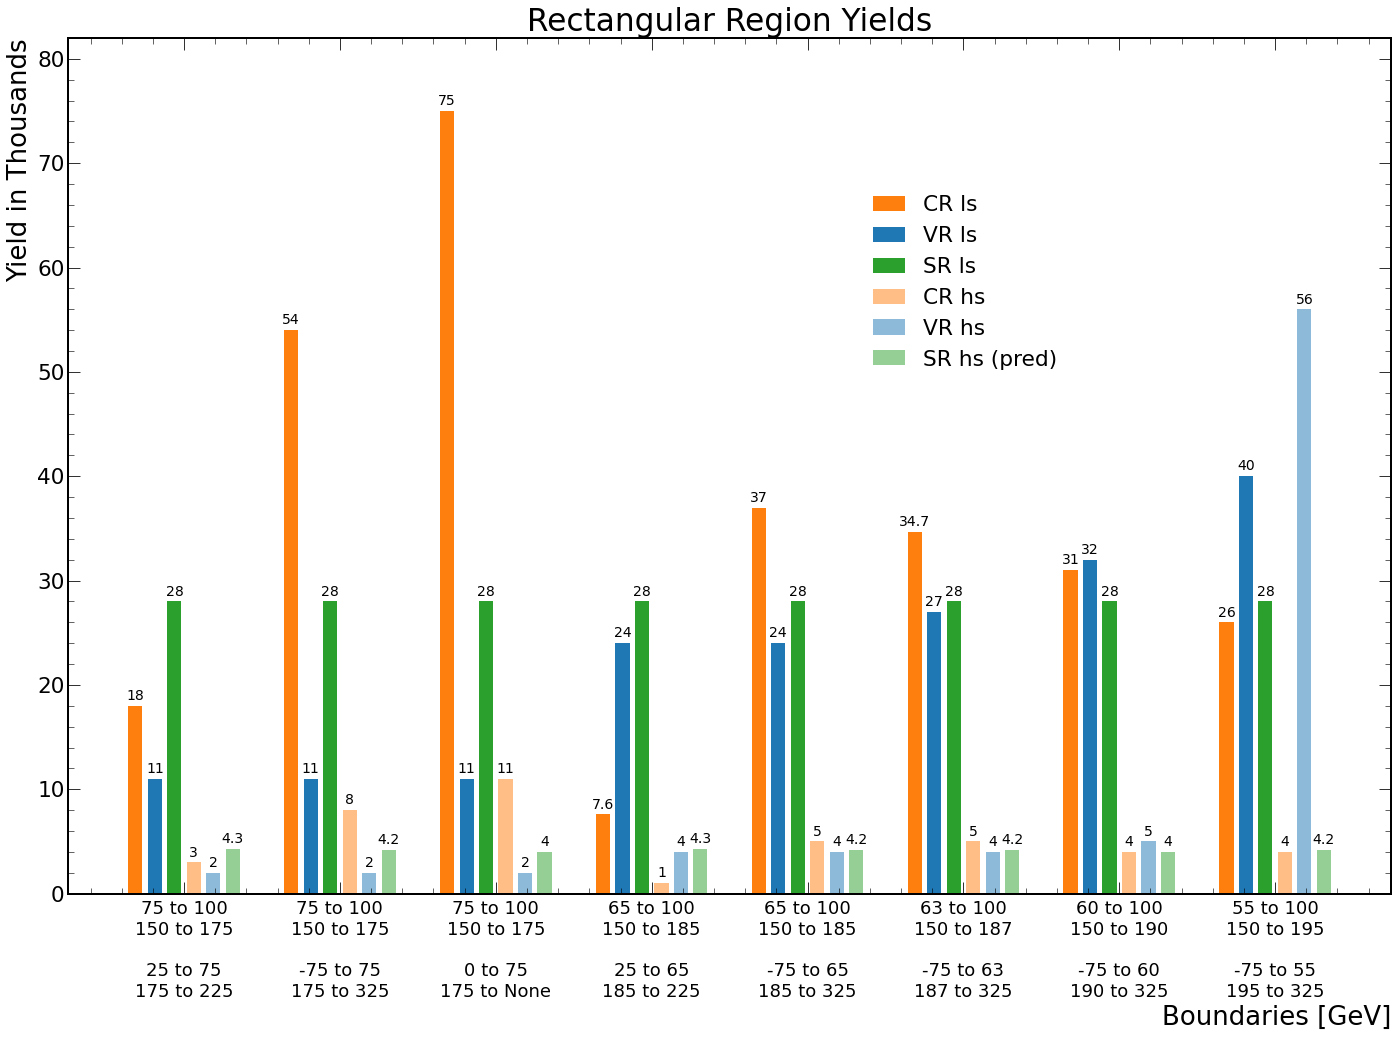

In [82]:
x = np.arange(len(labels))  # the label locations
pos = 1/8  # the width of the bars
width = 1/11

fig, ax = plt.subplots(figsize=(20,15))
rects4 = ax.bar(x - pos*5/2, CRls, width, label='CR ls', color='C1')
rects3 = ax.bar(x - pos*3/2, VRls, width, label='VR ls', color='C0')
rects5 = ax.bar(x - pos/2, SRls, width, label='SR ls', color='C2')
rects1 = ax.bar(x + pos/2, CRhs, width, label='CR hs', color='C1', alpha=0.5)
rects2 = ax.bar(x + pos*3/2, VRhs, width, label='VR hs', color='C0', alpha=0.5)
rects6 = ax.bar(x + pos*5/2, SRhs, width, label='SR hs (pred)', color='C2', alpha=0.5)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Boundaries [GeV]')
ax.set_ylabel('Yield in Thousands')
ax.set_title('Rectangular Region Yields')
ax.set_xticks(x, labels, fontsize=18)
ax.legend(loc=(0.6,0.6))

fs = 14

ax.bar_label(rects1, padding=3, fontsize=fs)
ax.bar_label(rects2, padding=3, fontsize=fs)
ax.bar_label(rects3, padding=3, fontsize=fs)
ax.bar_label(rects4, padding=3, fontsize=fs)
ax.bar_label(rects5, padding=3, fontsize=fs)
ax.bar_label(rects6, padding=3, fontsize=fs)

ax.set_ylim(0,82)

fig.tight_layout()

plt.show()

fig.savefig('rectangular_yields.pdf', bbox_inches='tight')